In [1]:
volume_macro = (12*12*4.8)*6 # m^3
accetanza_macro = 3100 # m^2 sr
volume_cupid = (3*3*3) # m^3
print (volume_macro,"m^3")
print (accetanza_macro,"m^2 sr")
print (volume_cupid,"m^3")

4147.2 m^3
3100 m^2 sr
27 m^3


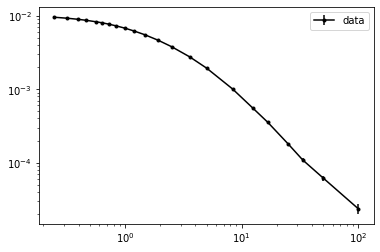

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
#
# pag 236 Grainder muon integral intensity at 600 m above see level cm-2 s-1 sr-1
#
x = np.array([0.247, 0.321, 0.393, 0.463, 0.564, 0.633, 0.722, 0.841, 
          1.008, 1.198, 1.478, 1.931, 2.508, 3.579, 5.008, 8.341, 
          12.51, 16.68, 25.01, 33.34, 50.01, 100.01])
F = np.array([9.56e-3, 9.264e-3, 8.970e-3, 8.689e-3, 8.293e-3, 8.037e-3, 7.713e-3, 
        7.286e-3, 6.756e-3, 6.199e-3, 5.520e-3, 4.630e-3, 3.793e-3, 2.760e-3, 1.934e-3,
        1.008e-3, 5.487e-4, 3.551e-4, 1.792e-4, 1.084e-4, 6.139e-5, 2.339e-5])
err = np.array([2.5,2.5,2.4,2.4,2.4,2.3,2.3,2.3,2.3,2.2,2.2,2.2,2.2,2.3,2.4,2.6,3.1,3.5,4.5,5.6,8.0,15.0])
err = F*err/100
plt.errorbar(x,F,yerr=err, fmt='k.-',label='data')
plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.show()

In [3]:

points = 100000
eta_array = np.random.random(points)
Fn=F/F[0]
hp = np.array([])
hit = 0
start_time = time.time()
dtime = points/10
# for j, eta in enumerate(eta_array):
#     if j % dtime == 0 : print("{:d}, elapsed: {:.1f}".format(j, time.time() - start_time))
#     for i in range(1, len(Fn)):
#         if Fn[i-1]<eta<=Fn[i]:
#             hit+=1
#             ci = (1/(x[i]-x[i-1]))
#             hp=np.append(hp, x[i-1] + (eta - F[i-1])/ci)

for j, eta in enumerate(eta_array):
    if j % dtime == 0 : 
        print("{:d}, elapsed: {:.1f}".format(j, time.time() - start_time))
        start_time = time.time()
    for i in range(1, len(Fn)):
        if Fn[i-1]>eta>=Fn[i]:
            hit+=1
            ci = (1/(x[i]-x[i-1]))
            hp=np.append(hp, x[i-1] + (eta - F[i-1])/ci)
        if  eta<Fn[-1]:
            hit+=1
            ci = (1/(x[i]-x[i-1]))
            hp=np.append(hp, x[i-1] + (eta - F[i-1])/ci)
 


print("points {:d}, hit {:d}, miss: {:d} ".format(points, hit, points-hit))

0, elapsed: 0.0
10000, elapsed: 0.2
20000, elapsed: 0.2
30000, elapsed: 0.3
40000, elapsed: 0.3
50000, elapsed: 0.4
60000, elapsed: 0.5
70000, elapsed: 0.6
80000, elapsed: 0.7
90000, elapsed: 0.7
points 100000, hit 104460, miss: -4460 


1.092678e+07


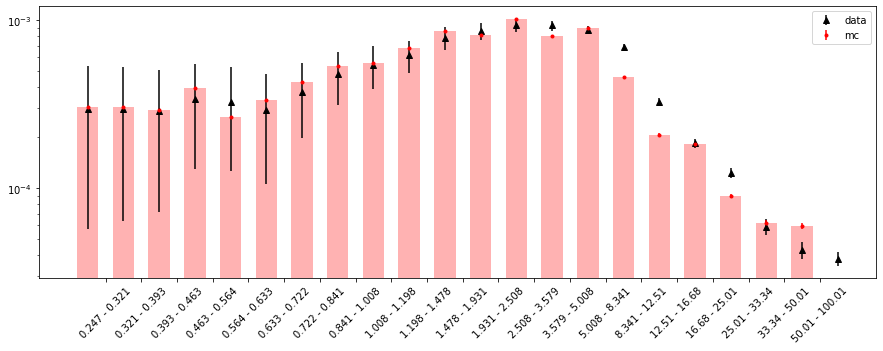

In [4]:
dF = np.array([])
for i in range(1, len(F)):
    dF = np.append(dF, F[i-1]-F[i])
    
xl = np.append(x, 100000)
hist, bins = np.histogram(hp, x)
norma = hit/F[0]
print ("{:e}".format(norma))
fig,ax = plt.subplots(figsize=(15,5))
ax.errorbar(range(len(F)),-np.gradient(F), yerr=err, fmt='k^', label="data")

ax.bar(range(len(hist)), hist/norma, width=0.6, alpha=0.3, color='red')
ax.errorbar(range(len(hist)), hist/norma, yerr=np.sqrt(hist)/norma, fmt='r.', label="mc")
ax.set_xticks([0.5+i for i,j in enumerate(hist)])
ax.set_xticklabels(['{} - {}'.format(x[i],x[i+1]) for i,j in enumerate(hist)], rotation=45)

#ax.set_xscale('log')
ax.set_yscale('log')
plt.legend()
plt.show()

In [5]:
len(F), len()

22

# flux 
![img](./mu_lngs.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
gm = 2.78
A0 = 0.26
# energy in GeV
# E0 = 1
# E1 = 1e4
# E = np.linspace(E0, E1, 20)
E0 = 0.1
E1 = 4
E = np.logspace(E0, E1, 20)
def rate_theta(E, theta):
    return 1.0/(1+1.1*E*np.cos(theta)/115) + 0.054/(1+1.1*E*np.cos(theta)/850)

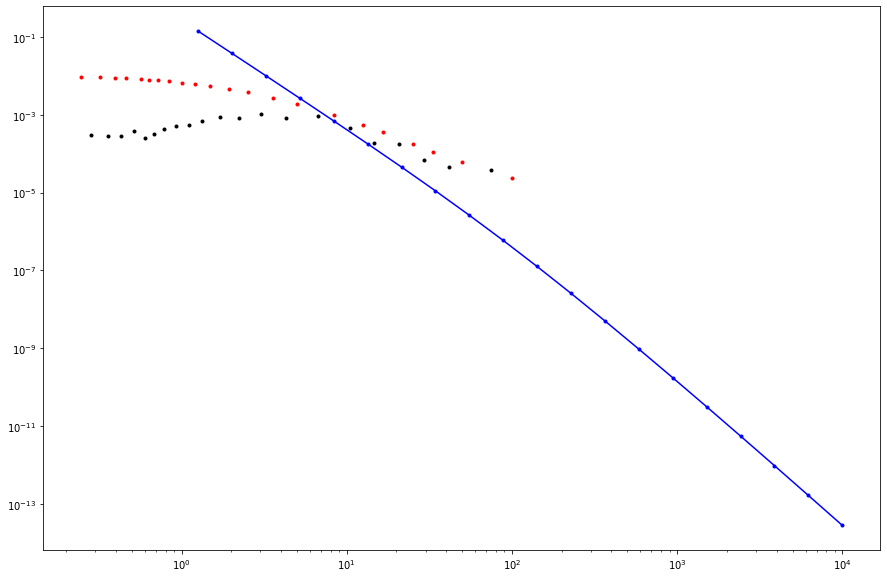

In [51]:
Nm = []
for i, e in enumerate(E):
    Nm.append(A0*rate_theta(e, 0)*e**(-gm))
    # if i > 0:
    #     Nm.append(A0*( rate_theta(e0, 0)*e0**(-gm+1) - rate_theta(e, 0)*e**(-gm+1)))
    #     #print(Nm, "cm^-2 s-1 sr -1")
    # e0 = e
    
plt.figure(figsize=(15, 10))
plt.plot(E, np.array(Nm), 'b.-')
plt.plot(Emean, Fdif, 'k.')
plt.plot(energy, flux, 'r.')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [11]:
E = 0.247; theta = 0 
A0*rate_theta(E, theta)*E**(-gm) 

13.339421966706482

In [15]:
maxgen = 1000
flux_pdf = flux/flux[0]
x = np.random.random(maxgen)*(energy[-1]-energy[0])
y = np.random.random(maxgen)

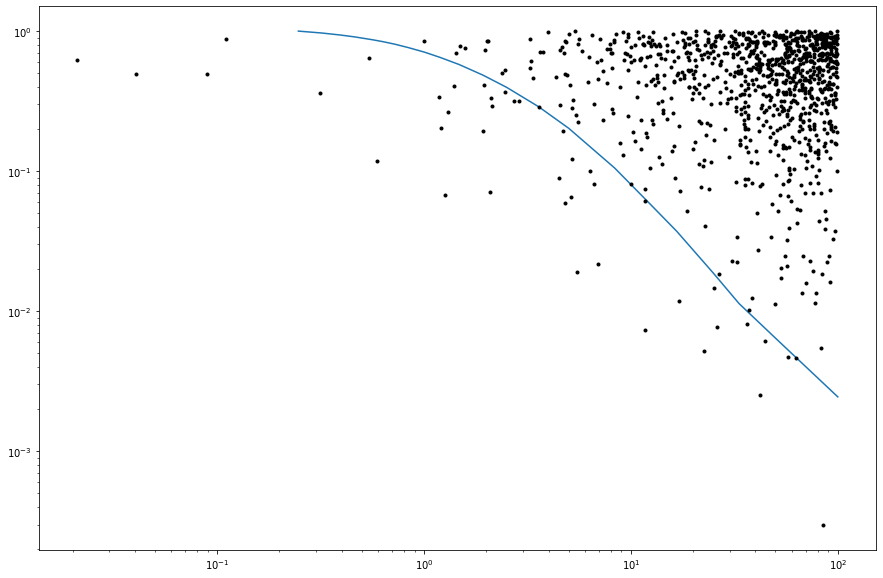

In [16]:
plt.figure(figsize=(15,10))
plt.plot(energy, flux_pdf)
plt.xscale('log')
plt.yscale('log')
plt.plot(x,y,'k.')
plt.show()

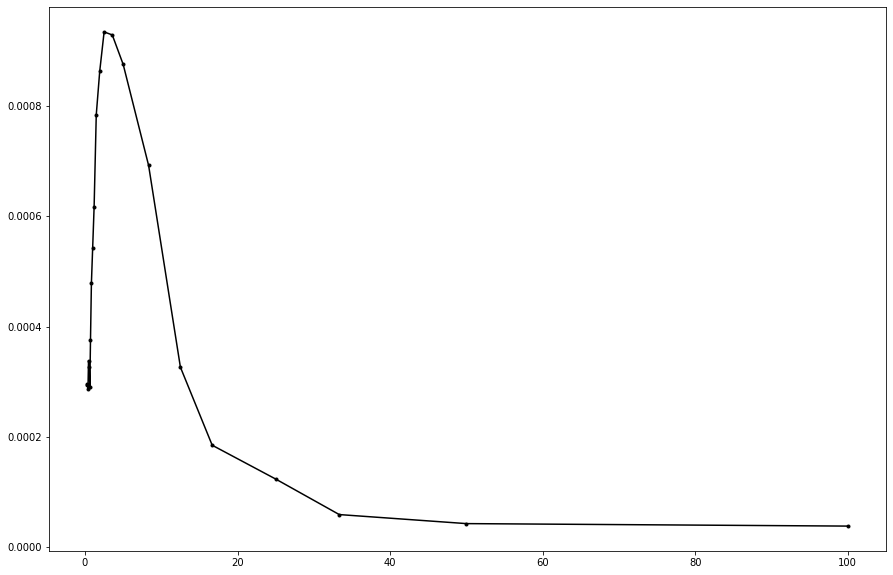

In [200]:
plt.figure(figsize=(15,10))
#plt.plot(energy, flux, 'r.-')
plt.plot(x, -np.gradient(F), 'k.-')
plt.show()

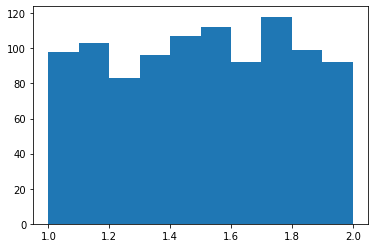

In [12]:
#
# distribuzione normale con inversione della funzione di probabilita
# 1/(a-b) tra a e b, 0 altrove
#
y = np.random.random(1000)
a = 1; b = 2
x = a+(b-a)*y
plt.hist(x,10)
plt.show()

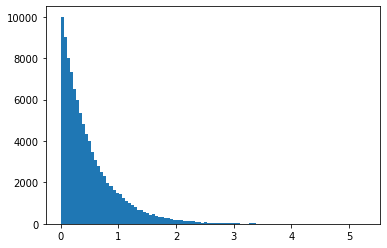

In [13]:
#
# distribuzione esponezilae con inversione della funzione di probabilita
# ae^-ax per x,a >0 , 0 x<0
#
y = np.random.random(100000)
a = 2
x = (-1/a)*np.log(y)
plt.hist(x, 100)
plt.show()

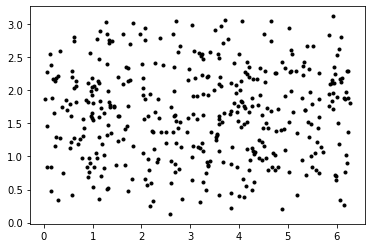

In [66]:
#
# distribuzione esponezilae con inversione della funzione di probabilita
# ae^-ax per x,a >0 , 0 x<0
#
g = np.random.random(400)
e = np.random.random(400)
phi = 2*np.pi*g
theta = np.arccos(1-2*e)
plt.plot(phi, theta, 'k.')
plt.show()

0


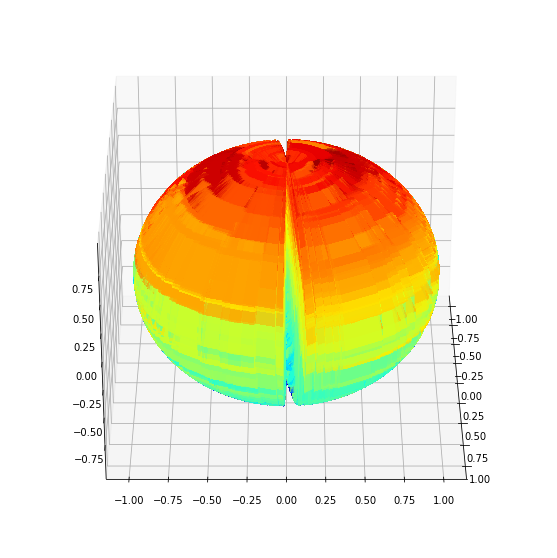

90


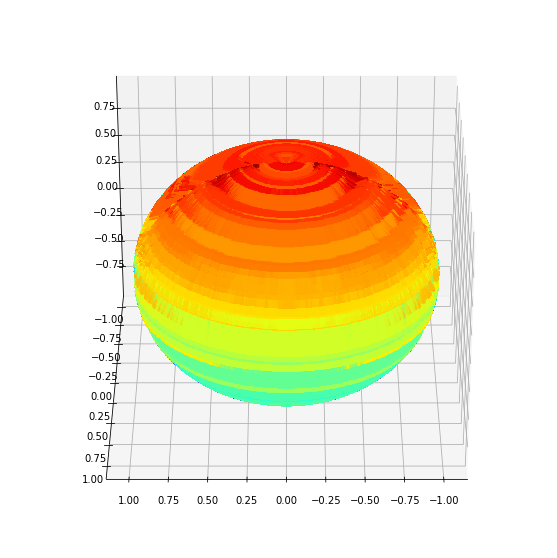

180


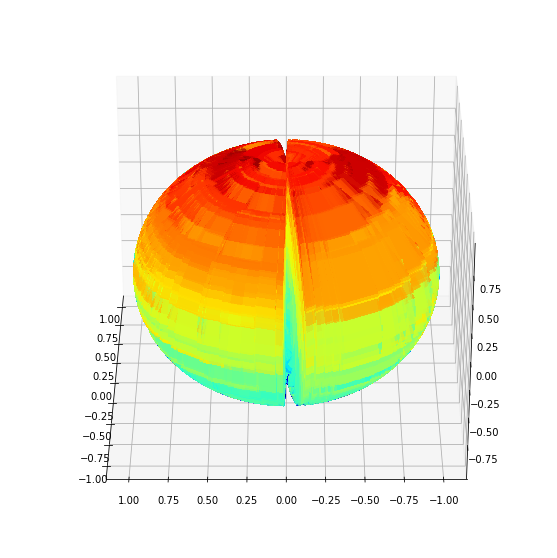

270


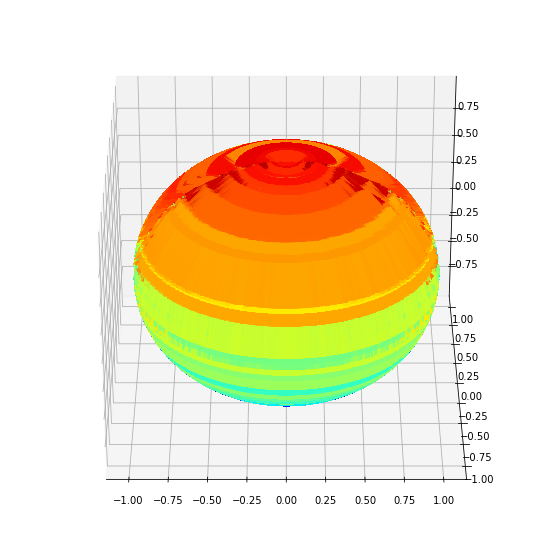

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

#theta, phi = np.linspace(0, 2 * np.pi, 40), np.linspace(0, np.pi, 40)
THETA, PHI = np.meshgrid(theta, phi)
# R = np.cos(PHI**2)
R = 1
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)


for angle in range(0, 360, 90):
    print (angle)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1, projection='3d')

    ax.view_init(30, angle)

    plot = ax.plot_surface(
        X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
        linewidth=0, antialiased=False, alpha=0.5)

    plt.show()
# ax.plot_wireframe(X, Y, Z, rstride=5, cstride=5)
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)